start: xbest= 16 ybest= 67 fbest= 4745 count= 0
break: xbest= 0 ybest= 0 fbest= 0 itr= 67
end: xbest= 0 ybest= 0 fbest= 0 itr= 67 count= 67


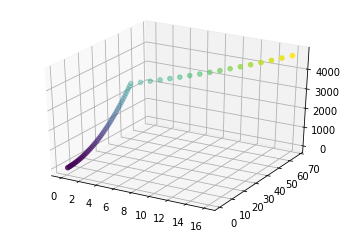

In [5]:
import random
import math
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt






def f(point):
  x=point[0]
  y=point[1]
  e=x**2+y**2
  return e

def neigh(min):
  n1=[min[0]-1,min[1], f([min[0]-1,min[1]]), 0,0]
  n2=[min[0]-1,min[1]-1, f([min[0]-1,min[1]-1]), 0,0]
  n3=[min[0],min[1]-1, f([min[0],min[1]-1]), 0,0]
  n4=[min[0]+1,min[1]-1, f([min[0]+1,min[1]-1]), 0,0]
  n5=[min[0]+1,min[1], f([min[0]+1,min[1]]), 0,0]
  n6=[min[0]+1,min[1]+1, f([min[0]+1,min[1]+1]), 0,0]
  n7=[min[0],min[1]+1, f([min[0],min[1]+1]), 0,0]
  n8=[min[0]-1,min[1]+1, f([min[0]-1,min[1]+1]), 0,0]
  neighbors=[n1,n2,n3,n4,n5,n6,n7,n8]
  return neighbors

neighbors=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
forbidden=[[0,0,1000000,0,0],[0,0,1000000,0,0],[0,0,10000000,0,0],[0,0,1000000,0,0]]
min=[random.randint(-10,40), random.randint(-20,100)]
fmin=f(min)
fbest=fmin
xbest=min[0]
ybest=min[1]
itr=0
search=[]
neighbors=neigh(min)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 1, 12000)
xline = np.linspace(-10, 1, 40)
yline = np.linspace(-20, 1, 100)


#ax.plot3D(xline, yline, zline, 'grey')
xdata=[]
ydata=[]
zdata=[]



count=0
print("start:","xbest=",xbest,"ybest=",ybest,"fbest=",fbest,"count=",count)
for i in range(5000):
  xdata.append(min[0])
  ydata.append(min[1]) 
  zdata.append(fmin)
  search=[]

  for i in neighbors:
    if (i[4]==0 and i[3]==10):
      search.append(i)
  if(len(search)!=0):
    for i in search:
      if(i[2]<=fmin):
        fmin=i[2]
        min[0]=i[0]
        min[1]=i[1]

      
  elif(len(search)== 0):
    for i in neighbors:
      if i[2]<=fmin and i  not in forbidden:
        fmin=i[2]
        min[0]=i[0]
        min[1]=i[1]
  for i in forbidden:
    if i[2]<=fbest:
      fmin=i[2]
      min[0]=i[0]
      min[1]=i[1]
    #print("",min[0],min[1],fmin)
  if fbest<fmin:
    itr=0
  if fbest>fmin:
    fbest=fmin
    xbest=min[0]
    ybest=min[1]
    itr=itr+1

  for i in neighbors:
    if(i[0]==min[0] and i[1]==min[1]):
      i[3]=i[3]+1#itr
      i[4]=i[4]+1#select
    else:
      i[3]=i[3]+1#itr

  newneighbors=neigh(min)

  for i in newneighbors:
    for j in neighbors:
      if(i[0]==j[0] and i[1]==j[1]):
        i=j
  
  c=0
  for i in neighbors:
    if(i[0]==min[0] and i[1]==min[1]):
      forbidden.pop(0)
      forbidden.append(neighbors[c])
      c=c+1
  cc=0
  for i in neighbors:
    if i[3]>=10:
      forbidden.pop(0)
      forbidden.append(neighbors[cc])
      cc=cc+1

  for i in search:
      if(i[0]==min[0] and i[1]==min[1]):
        forbidden.pop(0)  
  neighbors=newneighbors
  count=count+1
  
  if itr>=20 and xbest==0 and ybest==0:
    print("break:","xbest=",xbest,"ybest=",ybest,"fbest=",fbest,"itr=",itr) 
    break
print("end:","xbest=",xbest,"ybest=",ybest,"fbest=",fbest,"itr=",itr,"count=",count)
ax.scatter3D(xdata, ydata, zdata, c=zdata);

